In [1]:
# 부하량 데이터 전처리

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

path_dir1 = 'load_raw1' #석사일보
path_dir2 = 'load_raw2' #학사일보
file_list1 = os.listdir(path_dir1)
file_list2 = os.listdir(path_dir2)
dataframes1 = []
dataframes2 = []

date_col1 = []
date_col2 = []

for file in file_list1:
    file_path = os.path.join(path_dir1,file)
    df = pd.read_excel(file_path)
    dataframes1.append(df)
for file in file_list2:
    file_path = os.path.join(path_dir2,file)
    df = pd.read_excel(file_path)
    dataframes2.append(df)
print(dataframes1[0])
print(dataframes2[0])

           전력량 일보 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0             NaN        NaN        NaN        NaN        NaN        NaN   
1             NaN        NaN        NaN        NaN        NaN        NaN   
2             NaN        NaN        NaN        NaN        NaN        NaN   
3             NaN        NaN        NaN        NaN        NaN        NaN   
4             NaN        NaN        NaN        NaN        NaN        NaN   
5   2022년 07월 01일        NaN        NaN        NaN        NaN        NaN   
6              구분       SV-2        NaN        NaN        NaN        NaN   
7             NaN      전압 RS      전압 ST      전압 TR       전류 R       전류 S   
8              시간         KV         KV         KV          A          A   
9             00시       22.8       22.9       22.8       91.1       96.2   
10            01시       23.0       23.1       22.9       91.1       96.0   
11            02시       22.8       22.9       22.7       83.8       88.6   
12          

In [2]:
print(dataframes1[0]['Unnamed: 62']) # 전기전자컴퓨터동 (석사일보)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7      유효전력
8        KW
9     419.0
10    424.5
11    409.9
12    403.0
13    407.8
14    406.0
15    416.3
16    436.9
17    476.5
18    508.3
19    514.9
20    510.7
21    511.3
22    526.0
23    540.5
24    517.7
25    509.9
26    522.6
27    509.9
28    466.2
29    451.1
30    433.5
31    425.7
32    426.6
Name: Unnamed: 62, dtype: object


In [3]:
# 석사일보

column_name = 'Unnamed: '
load_data = []
load_sum = 0
load_col = []
for i in range(62,len(dataframes1[0].columns)):
    if(dataframes1[0][column_name+str(i)][7]=='유효전력'):
        load_col.append(str(i))
print(load_col)
for q in range(0,len(dataframes1)):
    load_data.append([])
    date_col1.append(dataframes1[q]['전력량 일보'][5])
    for f in range(9,33):
        load_sum=0
        for i in load_col:
            load_sum+=float(dataframes1[q][column_name+i][f])
        load_data[q].append(round(load_sum,1))
load_np1 = np.array(load_data)
print(load_np1)

['62', '67', '72', '77', '82', '87', '92', '97', '102', '107', '112', '117', '122', '127', '132', '137', '142', '147', '152']
[[3465.3 3316.6 3312.1 ... 3483.3 3392.2 3378.8]
 [3225.4 3234.9 3124.3 ... 3538.1 3569.4 3430.2]
 [3372.2 3271.4 3254.8 ... 3593.8 3543.6 3503.7]
 ...
 [3122.3 3024.8 2943.7 ... 3362.8 3410.4 3267.9]
 [3154.2 3046.8 3003.2 ... 3683.  3559.4 3520.3]
 [3377.6 3270.7 3182.7 ... 3457.4 3376.5 3417.9]]


In [4]:
print(dataframes2[0]['Unnamed: 63']) # 신재생동 (학사일보)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7       유효전력
8         KW
9      970.7
10     925.1
11     902.0
12     885.1
13     882.5
14     857.3
15     875.8
16     984.7
17    1094.0
18    1188.7
19    1212.5
20    1240.7
21    1173.0
22    1203.0
23    1233.6
24    1236.3
25    1229.0
26    1183.3
27    1076.0
28    1019.6
29    1016.5
30    1007.4
31     973.5
32     937.5
Name: Unnamed: 63, dtype: object


In [5]:
# 학사일보

load_data = []
load_sum = 0
load_col = []
for i in range(63,len(dataframes2[0].columns)):
    if(dataframes2[0][column_name+str(i)][7]=='유효전력'):
        load_col.append(str(i))
print(load_col)
for q in range(0,len(dataframes2)):
    load_data.append([])
    date_col2.append(dataframes1[q]['전력량 일보'][5])
    for f in range(9,33):
        load_sum=0
        for i in load_col:
            load_sum+=float(dataframes2[q][column_name+i][f])
        load_data[q].append(round(load_sum,1))
load_np2 = np.array(load_data)
print(load_np2)

['63', '68', '73', '78', '83', '88', '93', '98', '103', '108', '113', '118', '123', '128', '133', '138', '143', '148', '153', '158', '163', '168']
[[3130.3 2984.  2869.7 ... 3318.7 3212.2 3079.1]
 [3007.7 2911.  2809.3 ... 3191.8 3170.  3080.5]
 [2980.1 3004.  2885.8 ... 3337.5 3303.2 3120.8]
 ...
 [2813.2 2692.2 2615.9 ... 3149.9 3063.6 2968.5]
 [2910.5 2806.2 2653.4 ... 3337.7 3290.6 3165.1]
 [3050.3 2936.  2809.6 ... 3213.3 3099.8 3003.8]]


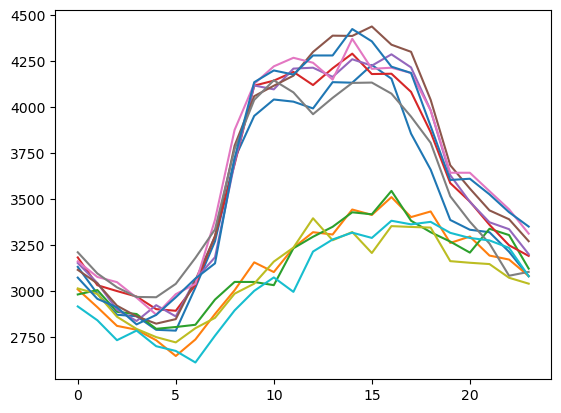

In [6]:
plt.plot(load_data[0])
plt.plot(load_data[1])
plt.plot(load_data[2])
plt.plot(load_data[3])
plt.plot(load_data[4])
plt.plot(load_data[5])
plt.plot(load_data[6])
plt.plot(load_data[7])
plt.plot(load_data[8])
plt.plot(load_data[9])
plt.plot(load_data[10])

In [7]:
load_np = np.array(load_data)
print(np.max(load_np1))
print(np.min(load_np1))

print(np.unravel_index(np.argmin(load_np1), load_np1.shape))

5391.0
2803.6
(58, 5)


In [8]:
print(date_col1)
print(date_col2)

['2022년 07월 01일', '2022년 07월 02일', '2022년 07월 03일', '2022년 07월 04일', '2022년 07월 05일', '2022년 07월 06일', '2022년 07월 07일', '2022년 07월 08일', '2022년 07월 09일', '2022년 07월 10일', '2022년 07월 11일', '2022년 07월 12일', '2022년 07월 13일', '2022년 07월 14일', '2022년 07월 15일', '2022년 07월 16일', '2022년 07월 17일', '2022년 07월 18일', '2022년 07월 19일', '2022년 07월 20일', '2022년 07월 21일', '2022년 07월 22일', '2022년 07월 23일', '2022년 07월 24일', '2022년 07월 25일', '2022년 07월 26일', '2022년 07월 27일', '2022년 07월 28일', '2022년 07월 29일', '2022년 07월 30일', '2022년 07월 31일', '2022년 08월 01일', '2022년 08월 02일', '2022년 08월 03일', '2022년 08월 04일', '2022년 08월 05일', '2022년 08월 06일', '2022년 08월 07일', '2022년 08월 08일', '2022년 08월 09일', '2022년 08월 10일', '2022년 08월 11일', '2022년 08월 12일', '2022년 08월 13일', '2022년 08월 14일', '2022년 08월 15일', '2022년 08월 16일', '2022년 08월 17일', '2022년 08월 18일', '2022년 08월 19일', '2022년 08월 20일', '2022년 08월 21일', '2022년 08월 22일', '2022년 08월 23일', '2022년 08월 24일', '2022년 08월 25일', '2022년 08월 26일', '2022년 08월 27일', '2022년 08월 28

In [9]:
for i in range(0,len(date_col1)):
    date_col1[i] = date_col1[i].replace('년 ','/').replace('월 ','/').replace('일','')
for i in range(0,len(date_col1)):
    date_col2[i] = date_col2[i].replace('년 ','/').replace('월 ','/').replace('일','')
print(date_col1)

#Check date same
if date_col1 == date_col2:
    print('Yes')
else:
    print('No')

['2022/07/01', '2022/07/02', '2022/07/03', '2022/07/04', '2022/07/05', '2022/07/06', '2022/07/07', '2022/07/08', '2022/07/09', '2022/07/10', '2022/07/11', '2022/07/12', '2022/07/13', '2022/07/14', '2022/07/15', '2022/07/16', '2022/07/17', '2022/07/18', '2022/07/19', '2022/07/20', '2022/07/21', '2022/07/22', '2022/07/23', '2022/07/24', '2022/07/25', '2022/07/26', '2022/07/27', '2022/07/28', '2022/07/29', '2022/07/30', '2022/07/31', '2022/08/01', '2022/08/02', '2022/08/03', '2022/08/04', '2022/08/05', '2022/08/06', '2022/08/07', '2022/08/08', '2022/08/09', '2022/08/10', '2022/08/11', '2022/08/12', '2022/08/13', '2022/08/14', '2022/08/15', '2022/08/16', '2022/08/17', '2022/08/18', '2022/08/19', '2022/08/20', '2022/08/21', '2022/08/22', '2022/08/23', '2022/08/24', '2022/08/25', '2022/08/26', '2022/08/27', '2022/08/28', '2022/08/29', '2022/08/30', '2022/08/31']
Yes


In [10]:
load_savefile = pd.DataFrame({})
for i in range(0,len(date_col1)):
    load_savefile[date_col1[i]] = load_np1[i]+load_np2[i]
load_savefile.to_csv('load_data')
print(load_savefile)

    2022/07/01  2022/07/02  2022/07/03  2022/07/04  2022/07/05  2022/07/06  \
0       6595.6      6233.1      6352.3      6550.6      6704.9      6705.0   
1       6300.6      6145.9      6275.4      6392.1      6427.8      6458.3   
2       6181.8      5933.6      6140.6      6232.4      6242.0      6276.3   
3       6088.8      5920.3      6018.5      6129.7      6072.2      6158.7   
4       5896.4      5780.2      5876.4      6006.4      6142.0      6105.4   
5       5879.8      5618.7      5884.3      6063.9      6025.7      6066.8   
6       6323.9      5792.8      5840.1      6404.8      6402.7      6439.0   
7       6779.6      6009.0      6139.3      6868.4      6733.4      7408.2   
8       8192.1      6256.0      6244.2      8193.0      8255.7      8355.1   
9       8838.3      6484.9      6329.1      9023.2      8998.9      9181.1   
10      8946.4      6444.6      6306.1      9137.9      9150.7      9235.8   
11      9006.6      6704.9      6660.3      9352.6      9372.9  

In [11]:
# 발전량 데이터 전처리

path_dir = 'pv_raw'
file_list = os.listdir(path_dir)
dataframes = []

date_col = []

for file in file_list:
    file_path = os.path.join(path_dir,file)
    df = pd.read_excel(file_path)
    dataframes.append(df)
print(dataframes[0])
print(len(dataframes))

         Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0   GIST 태양광 발전량 일보        NaN        NaN        NaN        NaN        NaN   
1               NaN        NaN        NaN        NaN        NaN        NaN   
2                시간      환경 감시        NaN        NaN        NaN        축구장   
3               NaN        수평면       외기온도        경사면       모듈온도      누적발전량   
4               NaN        w/㎡          ℃        w/㎡          ℃        kWh   
5              00 시        0.0       25.6        0.0       23.0   757191.9   
6              01 시        0.0       25.1        0.0       22.9   757191.9   
7              02 시        0.0       24.6        0.0       22.8   757191.9   
8              03 시        0.0       23.9        0.0       20.8   757191.9   
9              04 시        0.0       23.2        0.0       20.2   757191.9   
10             05 시        0.0       22.8        0.0       20.2   757191.9   
11             06 시       54.0       25.4       13.0       21.6 

In [12]:
print(dataframes[0]['Unnamed: 33'][1])
print(dataframes[0]['Unnamed: 6'])

2022년 07월 01일
0        NaN
1        NaN
2        NaN
3     시간당발전량
4        kWh
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       5.3
13      33.3
14      33.0
15      82.8
16     107.6
17     123.4
18      35.6
19     108.1
20      89.5
21      58.9
22      47.1
23      19.9
24       0.3
25       0.0
26       0.0
27       0.0
28       0.0
29     142.2
Name: Unnamed: 6, dtype: object


In [13]:
pv_data = []
pv_sum = 0
pv_col = []
for i in range(1,len(dataframes[0].columns)):
    if(dataframes[0][column_name+str(i)][3]=='시간당발전량'):
        pv_col.append(str(i))
print(pv_col)
for q in range(0,len(dataframes)):
    pv_data.append([])
    date_col.append(dataframes[q]['Unnamed: 33'][1])
    for f in range(5,29):
        pv_sum=0
        for i in pv_col:
            pv_sum+=float(dataframes[q][column_name+i][f])
        pv_data[q].append(round(pv_sum,1))
pv_np = np.array(pv_data)
print(pv_np)

['6', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '28', '30', '32', '34']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
for i in range(0,len(date_col)):
    date_col[i] = date_col[i].replace('년 ','/').replace('월 ','/').replace('일','')
print(date_col)

['2022/07/01', '2022/07/02', '2022/07/03', '2022/07/04', '2022/07/05', '2022/07/06', '2022/07/07', '2022/07/08', '2022/07/09', '2022/07/10', '2022/07/11', '2022/07/12', '2022/07/13', '2022/07/14', '2022/07/15', '2022/07/16', '2022/07/17', '2022/07/18', '2022/07/19', '2022/07/20', '2022/07/21', '2022/07/22', '2022/07/23', '2022/07/24', '2022/07/25', '2022/07/26', '2022/07/27', '2022/07/28', '2022/07/29', '2022/07/30', '2022/07/31', '2022/08/01', '2022/08/02', '2022/08/03', '2022/08/04', '2022/08/05', '2022/08/06', '2022/08/07', '2022/08/08', '2022/08/09', '2022/08/10', '2022/08/11', '2022/08/12', '2022/08/13', '2022/08/14', '2022/08/15', '2022/08/16', '2022/08/17', '2022/08/18', '2022/08/19', '2022/08/20', '2022/08/21', '2022/08/22', '2022/08/23', '2022/08/24', '2022/08/25', '2022/08/26', '2022/08/27', '2022/08/28', '2022/08/29', '2022/08/30', '2022/08/31']


In [15]:
pv_savefile = pd.DataFrame({})
for i in range(0,len(date_col)):
    pv_savefile[date_col[i]] = pv_np[i]
pv_savefile.to_csv('pv_data')
print(pv_savefile)

    2022/07/01  2022/07/02  2022/07/03  2022/07/04  2022/07/05  2022/07/06  \
0          0.0         0.0         0.0         0.0         0.0         0.0   
1          0.0         0.0         0.0         0.0         0.0         0.0   
2          0.0         0.0         0.0         0.0         0.0         0.0   
3          0.0         0.0         0.0         0.0         0.0         0.0   
4          0.0         0.0         0.0         0.0         0.0         0.0   
5          0.0         0.0         0.0         0.0         0.0         0.0   
6          7.6        15.6         6.0         0.9         7.5        14.2   
7         52.2        63.0        78.0        19.8        85.4        31.2   
8        201.2       206.0       176.2       220.8       124.4       216.2   
9        386.3       375.5       262.1       212.7       204.7       208.9   
10       542.4       562.2       442.5       232.7       252.2       473.9   
11       497.1       479.0       616.3       169.6       269.0  

In [16]:
print(pv_savefile['2022/08/23'])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       7.3
8      30.6
9     152.5
10     81.6
11    126.3
12     94.1
13     64.4
14     78.1
15    119.8
16      9.2
17     27.2
18     -0.4
19      0.2
20      0.0
21      0.0
22      0.0
23      0.0
Name: 2022/08/23, dtype: float64


In [17]:
# 발전량 자료 기후 데이터 추출

# 수평면, 외기온도, 경사면, 모듈온도

temp_data = []
temp_list = []
for i in range(0,len(dataframes)):
    temp_list=[]
    for f in range(5,29):
        temp_list.append(dataframes[i]['Unnamed: 1'][f]+'/'+
                        dataframes[i]['Unnamed: 2'][f]+'/'+
                        dataframes[i]['Unnamed: 3'][f]+'/'+
                        dataframes[i]['Unnamed: 4'][f]+'/')
    temp_data.append(temp_list)
temp_np = np.array(temp_data)
print(temp_np)


[['0.0/25.6/0.0/23.0/' '0.0/25.1/0.0/22.9/' '0.0/24.6/0.0/22.8/' ...
  '0.0/28.2/0.0/25.8/' '0.0/25.4/0.0/23.0/' '0.0/23.9/0.0/22.4/']
 ['0.0/23.2/0.0/20.2/' '0.0/23.3/0.0/20.2/' '0.0/22.5/0.0/20.2/' ...
  '0.0/27.3/0.0/25.7/' '0.0/26.6/0.0/25.7/' '0.0/25.9/0.0/24.4/']
 ['0.0/25.4/0.0/24.3/' '0.0/25.6/0.0/24.3/' '0.0/25.1/0.0/23.0/' ...
  '0.0/25.1/0.0/23.0/' '0.0/25.1/0.0/23.0/' '0.0/24.4/0.0/23.0/']
 ...
 ['0.0/20.5/0.0/18.8/' '0.0/19.8/0.0/17.5/' '0.0/19.8/0.0/17.5/' ...
  '0.0/22.7/0.0/20.2/' '0.0/22.4/0.0/20.2/' '0.0/22.3/0.0/20.2/']
 ['0.0/22.3/0.0/20.2/' '0.0/22.3/0.0/20.2/' '0.0/22.3/0.0/20.2/' ...
  '0.0/24.6/0.0/23.0/' '0.0/24.4/0.0/23.0/' '0.0/24.6/0.0/23.0/']
 ['0.0/24.2/0.0/23.0/' '0.0/23.8/0.0/23.0/' '0.0/23.8/0.0/22.8/' ...
  '0.0/20.9/0.0/18.8/' '0.0/20.7/0.0/18.8/' '0.0/19.7/0.0/17.5/']]


In [18]:
temp_savefile = pd.DataFrame({})
for i in range(0,len(date_col)):
    temp_savefile[date_col[i]] = temp_np[i]
temp_savefile.to_csv('temp_data')
print(temp_savefile)

                  2022/07/01              2022/07/02              2022/07/03  \
0         0.0/25.6/0.0/23.0/      0.0/23.2/0.0/20.2/      0.0/25.4/0.0/24.3/   
1         0.0/25.1/0.0/22.9/      0.0/23.3/0.0/20.2/      0.0/25.6/0.0/24.3/   
2         0.0/24.6/0.0/22.8/      0.0/22.5/0.0/20.2/      0.0/25.1/0.0/23.0/   
3         0.0/23.9/0.0/20.8/      0.0/22.2/0.0/20.2/      0.0/25.4/0.0/23.0/   
4         0.0/23.2/0.0/20.2/      0.0/22.2/0.0/20.2/      0.0/24.8/0.0/23.0/   
5         0.0/22.8/0.0/20.2/      0.0/21.3/0.0/20.0/      0.0/24.2/0.0/22.8/   
6       54.0/25.4/13.0/21.6/    65.0/24.6/26.0/20.1/    24.0/24.2/16.0/22.8/   
7      213.0/30.7/79.0/25.6/   226.0/30.1/92.0/24.6/  211.0/30.0/104.0/25.6/   
8     412.0/34.5/271.0/31.2/  403.0/32.1/263.0/31.1/  301.0/34.4/213.0/31.2/   
9     751.0/36.1/610.0/40.8/  588.0/34.2/464.0/38.9/  381.0/38.1/311.0/38.1/   
10    796.0/44.4/693.0/48.7/  795.0/36.9/714.0/44.9/  634.0/37.1/558.0/42.1/   
11    997.0/45.8/928.0/56.0/  832.0/47.2

In [32]:
# 기상청 날씨 데이터
Wpath_dir = 'weather_raw'
Wfile_list = os.listdir(path_dir)
Wdataframes = []

Wdate_col = []

for file in Wfile_list:
    file_path = os.path.join(Wpath_dir,file)
    df = pd.read_csv(file_path,encoding='CP949')
    Wdataframes.append(df)
print(Wdataframes[0])

       지점 지점명                일시  기온(°C)  강수량(mm)  풍속(m/s)  풍향(16방위)  습도(%)  \
0     156  광주  2022-07-01 00:00    25.6      NaN      2.2       180     99   
1     156  광주  2022-07-01 01:00    25.1      NaN      1.4       200     99   
2     156  광주  2022-07-01 02:00    25.0      NaN      1.8       180     99   
3     156  광주  2022-07-01 03:00    24.9      NaN      1.6       200     99   
4     156  광주  2022-07-01 04:00    24.5      NaN      0.4         0     99   
...   ...  ..               ...     ...      ...      ...       ...    ...   
1483  156  광주  2022-08-31 19:00    23.2      NaN      1.5       200     92   
1484  156  광주  2022-08-31 20:00    22.4      NaN      0.5        90     97   
1485  156  광주  2022-08-31 21:00    21.7      NaN      0.4         0     98   
1486  156  광주  2022-08-31 22:00    21.6      NaN      1.0        70     98   
1487  156  광주  2022-08-31 23:00    21.6      NaN      0.7        70     99   

      일조(hr)  일사(MJ/m2)  전운량(10분위)  지면온도(°C)  
0        NaN    

In [54]:
w_columns = Wdataframes[0].columns
print(w_columns)
w_date = pd.DataFrame({})
for i in range(0,len(Wdataframes[0]['일시'])):
    w_data = Wdataframes[0]['일시'][i].split(' ')[1].split(':')[0]+'/'
    for i in range
    w_date[Wdataframes[0]['일시'][i].split(' ')[0].replace('-','/')]=[]
print(w_date)

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '지면온도(°C)'],
      dtype='object')
Empty DataFrame
Columns: [2022/07/01, 2022/07/02, 2022/07/03, 2022/07/04, 2022/07/05, 2022/07/06, 2022/07/07, 2022/07/08, 2022/07/09, 2022/07/10, 2022/07/11, 2022/07/12, 2022/07/13, 2022/07/14, 2022/07/15, 2022/07/16, 2022/07/17, 2022/07/18, 2022/07/19, 2022/07/20, 2022/07/21, 2022/07/22, 2022/07/23, 2022/07/24, 2022/07/25, 2022/07/26, 2022/07/27, 2022/07/28, 2022/07/29, 2022/07/30, 2022/07/31, 2022/08/01, 2022/08/02, 2022/08/03, 2022/08/04, 2022/08/05, 2022/08/06, 2022/08/07, 2022/08/08, 2022/08/09, 2022/08/10, 2022/08/11, 2022/08/12, 2022/08/13, 2022/08/14, 2022/08/15, 2022/08/16, 2022/08/17, 2022/08/18, 2022/08/19, 2022/08/20, 2022/08/21, 2022/08/22, 2022/08/23, 2022/08/24, 2022/08/25, 2022/08/26, 2022/08/27, 2022/08/28, 2022/08/29, 2022/08/30, 2022/08/31]
Index: []

[0 rows x 62 columns]
